# Сборный проект № 1. Исследование продаж компьютерных игр.


# Описание проекта:

Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.


Перед нами данные до 2016 года. Нам необходимо провести исследования, на основании которых интернет-магазин спланирует маркетинговую кампанию на 2017-й.

**План исследования:**
1. Изучить общую информацию о данных.
2. Обработать данные на предмет пропусков, неправильных типов данных и т. п.
3. Провести исследовательский анализ: выделить актуальный для исследования период; посмотреть, какие платформы лидируют по продажам в актуальный период, как влияют на продажи внутри платформ отзывы пользователей и критиков; посмотреть на общее распределение игр по жанрам и провести другие необходимые исследования. 
4. Составить портрет пользователя каждого региона: определить пользовательский рейтинг платформ, жанров и категорий ESRB.
5. Проверить гипотезы, выдвинутые заказчиком. 
6. Составить вывод по проведённому исследованию.

**Оглавление**
1. [Изучение общей информации о данных](#1)
2. [Предобработка данных](#2)
3. [Исследовательский анализ данных](#3)
4. [Составление портрета пользователя каждого региона](#4)
5. [Проверка гипотез](#5)
6. [Вывод](#6)

<a id="1"></a>
## Изучение общей информации о данных

**1.1** Импортируем необходимые для работы с данными библиотеки.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as st
from scipy.stats import binom
from math import sqrt

**1.2** Сохраним датафрейм с необходимыми для работы данными в переменную `games`.

In [3]:
games = pd.read_csv('datasets/games.csv')

**1.3** Выведем первые строки датафрейма и изучим общую информацию.

In [4]:
games.head(15)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [5]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**1.4** Мы имеем набор данных из 11 столбцов и 16 715 строк. 

**Какая информация содержится в каждом столбце:**
- `Name` — название игры.
- `Platform` — платформа.
- `Year_of_Release` — год выпуска.
- `Genre` — жанр игры.
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий).
- `EU_sales` — продажи в Европе (миллионы проданных копий).
- `JP_sales` — продажи в Японии (миллионы проданных копий).
- `Other_sales` — продажи в других странах (миллионы проданных копий).
- `Critic_Score` — оценка критиков (максимум 100).
- `User_Score` — оценка пользователей (максимум 10).
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

По общей информации мы видим, что в таблице присутствуют пропуски в столбцах `Name`, `Year_of_Release`, `Genre`, `Critic_Score`, `User_Score` и `Rating`.

Также видно, что информация в некоторых столбцах имеет некорректный тип данных. 

Кроме того, названия столбов имеют заглавные буквы, что является нежелательным.

С этими проблемами разберёмся в следующем шаге исследовательской работы.

**1.5** Сразу узнаем, данные за какой период представлены в нашем датафрейме.

In [10]:
print(games['Year_of_Release'].min())

1980.0


In [11]:
print(games['Year_of_Release'].max())

2016.0


**1.6** Как итог, мы работаем с играми, вышедшими с 1980 по 2016 год. 

<a id="2"></a>
## Предобработка данных

**2.1** Для начала приведём все названия столбов к нижнему регистру. 

In [12]:
games.columns = games.columns.str.lower()
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


**2.2** Теперь обработаем пропуски в таблице, где это необходимо. Как мы уже выяснили, пропуски содержат столбцы `name`, `year_of_release`, `genre`, `critic_score`, `user_score` и `rating`.

В столбцах `name` и `genre` всего по 2 пропуска, при этом информация о названии игры является ключевой в исследовании. Мы не можем анализировать игру, не зная её названия. Предлагаем удалить строки с пропусками в этом столбце. Возможно, жанр не указан для тех же игр, у которых нет названия.

In [14]:
games = games.dropna(subset =['name']).reset_index(drop=True)
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**2.3** Наша теория подтвердилась. Удалив строки с пропусками в столбце `name`, мы также избавились от пропусков в столбце `genre`. 

Теперь посмотрим подробнее на стоблец `year_of_release`. Мы видим, что в столбце есть пропуски, однако мы не можем предугадать, в каком году вышла игра, и замена пропусков медианным или средним значением тоже не будет объективной. Поэтому предлагаем удалить строки, в котором не указан год (их менее 300), так как мы будем проводить исследование по прогнозированию популярности игр на последующий год, а значит, именно данные о годе выхода игры являются одними из самым важных. Следовательно, игра без года выпуска не будет иметь значение в прогнозировании.

Также из-за наличия пропусков тип данных в столбце имеет значение `float`, а не `int`. Поэтому выведем уникальные значения столбца, чтобы убедиться, что там нет десятичных годов. 

In [15]:
games = games.dropna(subset =['year_of_release']).reset_index(drop=True)

In [16]:
games['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000., 1995., 1991., 1981., 1987., 1980.,
       1983.])

**2.4** Все года указаны целыми числами, от пропусков мы избавились. 

Теперь посмотрим на данные в столбце `critic_score`, который содержит много пропусков. 

In [17]:
games['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

**2.5** Видно, что все данные представлены целыми числами и разброс оценок достаточно велик. Опять же, заменять пропуски средним или медианным не является правильным решением, так как у игр в одном и том же жанре или одного года могут быть совершенно разные рейтинги, которые невозможно предугадать. 

Заменять рейтинг на ноль тоже неправильно, так как это может расцениться как самый низкий рейтинг, а не его отсутствие. 

Оставим пропуски в этом столбце. 

**2.6** Теперь рассмотрим данные в столбце `user_score`.

In [18]:
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

**2.7** Мы видим, что здесь данные представлены уже не целыми, а десятичными числами. 

Также интересным является значение `tbd`. Оно расшифровывается как `to be determined = будет определено`. То есть можно сказать, что у данных игр пока что нулевой рейтинг из-за отсутствия оценок. 

Предлагаем заменить значения `tbd` на 0, а пропуски оставить в неизменном виде по аналогии с оценками критиков. 

In [19]:
games.loc[games['user_score'] == 'tbd', 'user_score'] = '0'

In [20]:
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '0', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

**2.8** Теперь посмотрим на столбец `rating`.

In [21]:
games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

**2.9** В нём указаны буквенные категории возрастного рейтинга игры. 

Интересно, что рейтинг `E` (Everyone) - это новое название рейтинга `K-A` (Kids to Adults). Получается, что в столбце один и тот же рейтинг указан разными категориями. Предлагаем заменить `K-A` на `E`. 

In [22]:
games.loc[games['rating'] == 'K-A', 'rating'] = 'E'

In [23]:
games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'AO', 'EC', 'RP'], dtype=object)

**2.10** Теперь рейтинг указан верно.

Выведем ещё раз общую информацию после обработки пропусков.

In [24]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**2.11** Итого мы обработали все возможные пропуски, оставив их в столбцах `critic_score`, ` user_score` и `rating`, так как неправильно будет заменять значения в этих столбцах средним, медианным или нулевым значениями. Удаление же этих строк приведёт к большой потере данных.

**2.12** Теперь преобразуем данные в нужный тип в столбце`user_score`. Сейчас там представлен тип данных `object`, хотя столбец после обработки имеет только числовые значения. Преобразуем данные в тип `float`. 

Также преобразуем данные в столбце `year_of_release` в значение `int`.

In [25]:
games['user_score'] = games['user_score'].astype('float')
games['year_of_release'] = games['year_of_release'].astype('int')
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


**2.13** Теперь проведём проверку на дубликаты. Для начала проверим данные на наличие явных дубликатов.

In [27]:
print(games.duplicated().sum())

0


**2.14** Датафрейм не содержит явных дубликатов. Теперь проверим столбец `genre` на наличие неявных дубликатов. Ручная проверка `name`, скорее всего, не даст результатов, так как названий слишком много.

In [28]:
games.sort_values(by='genre')['genre'].unique()

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy'], dtype=object)

**2.15** Проверка не выявила дубликаты. 

**2.16** Мы обработали данные датафрейма.

Теперь посчитаем суммарные продажи каждой игры во всех регионах и запишем их в отдельный столбец.

In [29]:
games['total_sales'] = games[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [30]:
games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31


### Вывод:

В рамках предобработки данных была проведена следующаю работа:
1. Удалены строки с пропусками в столбцах `name`, `genre` и `year_of_release`.
2. В стоблце `user_score` заменено значение `tbd` на 0.
3. Преобразован тип данных в столбце `user_score`: `object` на `float`; тип данных в столбце `year_of_release`: `float` на `int`. 
4. Создан столбец `total_sales` с суммарными продажами каждой игры во всех регионах.

<a id="3"></a>
##  Исследовательский анализ данных

**3.1** Посмотрим, сколько игр выпускалось в разные годы. И определим, важны ли данные за все периоды?

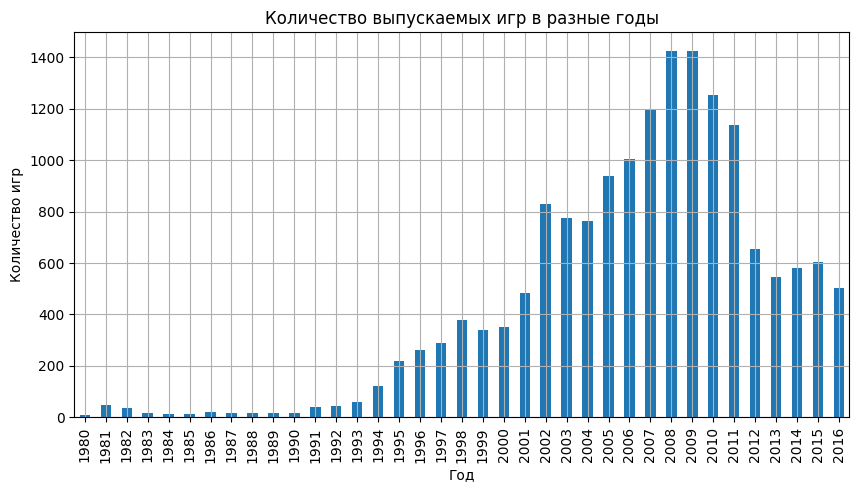

In [42]:
plt.figure(figsize=(10, 5))

games.groupby('year_of_release')['name'].count().plot(kind='bar', grid=True)
plt.title('Количество выпускаемых игр в разные годы')
plt.xlabel('Год')
plt.ylabel('Количество игр')
plt.show()

In [33]:
games.groupby('year_of_release')['name'].count()

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

**3.2** Из данных видно, что в 80-х и начале 90-х гг количество выпускаемых игр было очень небольшим. А затем с каждым годом выходило всё больше игр, и пик пришёлся на 2008-2009 годы (более 1 400 игр в год). 

Затем показатель начал достаточно быстро падать, и основной скачок вниз произошёл в 2012 году: (с 1136 в 2011 году на 653 в 2012 году). После чего игры выходили достаточно равномерно (около 500-600 игр в год). Скорее всего, такое падение обусловлено развитием мобильных технологий: многие игры стали разрабатываться для смартфонов.

Исходя из рассмотренных данных, было принято решение не рассматривать пиковые и низкопродуктивные периоды. Объективными показателями станут данные за последние годы, в которых количество выпускаемых игр было достаточно равномерным. 

Так как игровая индустрия быстроменяющая сфера, **было принято решение взять для исследования небольшой период: 2014-2016 годы**. В эти годы не было резких взлётов и падений, что позволяет рассматривать этот период как хороший (стабильный) для прогнозирования. 

**3.3** Перед изучением актуального периода рассмотрим, как менялись продажи по платформам за все года. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам.

Для начала найдём платформы с наибольшими суммарными продажами.
А затем визуализируем данные показатели.

In [36]:
top_all_platform = games.pivot_table(index='platform', values='total_sales', aggfunc='sum')\
.sort_values(by='total_sales', ascending=False).head(10)

top_all_platform

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


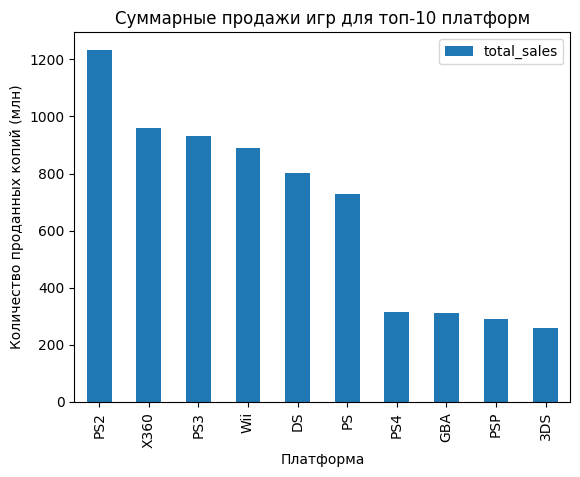

In [43]:
top_all_platform.plot(kind='bar')
plt.title('Суммарные продажи игр для топ-10 платформ')
plt.xlabel('Платформа')
plt.ylabel('Количество проданных копий (млн)')
plt.show()

**3.4** Возьмём 6 платформ с наибольшими показателями суммарных продаж и создадим с ними отдельный датафрейм для дальнейшего построения графиков.

In [44]:
top_six_platform = games.query('platform == "PS2" or platform == "X360" or platform == "Wii" or platform == "PS3" or platform == "DS" or platform == "PS"')
top_six_platform['platform'].unique()

array(['Wii', 'DS', 'X360', 'PS3', 'PS2', 'PS'], dtype=object)

**3.5** Теперь на основе полученного датафрейма создадим график, показывающий распределение продаж по годам. 

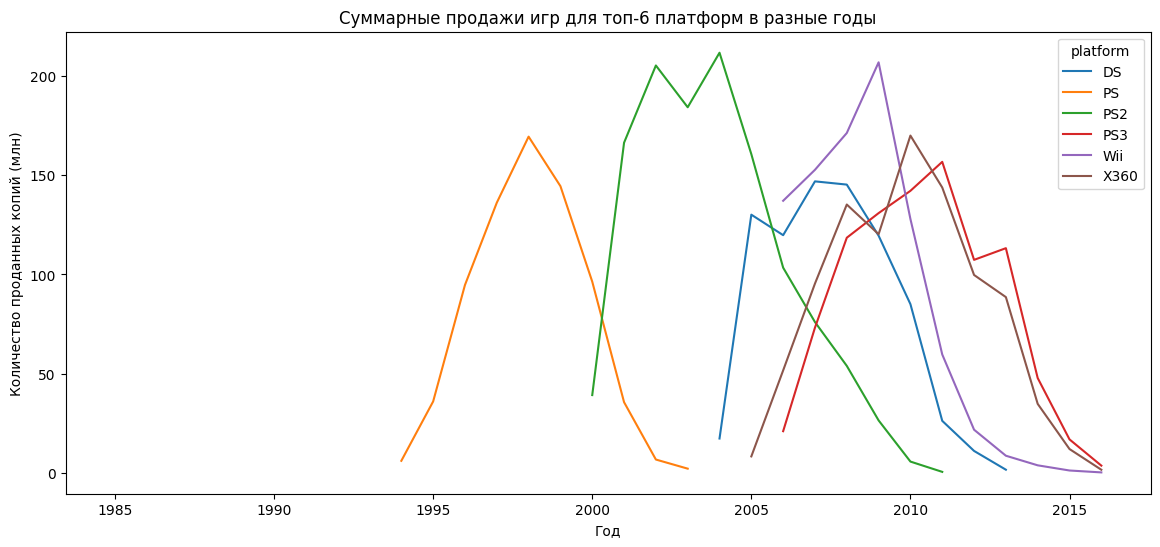

In [50]:
top_six_platform.pivot_table(index='year_of_release', columns='platform', \
values='total_sales', aggfunc='sum').plot(figsize=(14,6))
plt.title('Суммарные продажи игр для топ-6 платформ в разные годы')
plt.xlabel('Год')
plt.ylabel('Количество проданных копий (млн)')
plt.show()

**3.6** На графике видно, что в данных явно есть выбросы. Посчитаем продажи по годам для всех топовых платформ. 

In [51]:
top_six_platform.groupby('year_of_release')['total_sales'].sum()

year_of_release
1985      0.02
1994      6.03
1995     35.96
1996     94.70
1997    136.17
1998    169.49
1999    144.53
2000    135.54
2001    202.02
2002    212.05
2003    186.38
2004    229.08
2005    299.05
2006    432.96
2007    544.30
2008    624.31
2009    604.13
2010    530.81
2011    386.90
2012    239.82
2013    211.96
2014     86.25
2015     29.92
2016      5.30
Name: total_sales, dtype: float64

**3.7** Явно выделяется 1985 год с минимальным значением продаж, оторванный от остального периода. Выведем на экран строки по 1985 году. 

In [52]:
top_six_platform.query('year_of_release == 1985')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15704,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,NaN,NaN,NaN,0.02


**3.8** Этому году соответствует лишь одна строка, следовательно, можно считать её выбросом, содержащем некорректную информацию. Удалим эту строку из нашего датафрейма (не будем удалять её из исходного, так как в дальнейшем мы будем работать только с данными за 2012-2016 годы).

In [53]:
top_six_platform = top_six_platform.query('year_of_release >= 1994')

**3.9** Теперь построим график повторно.

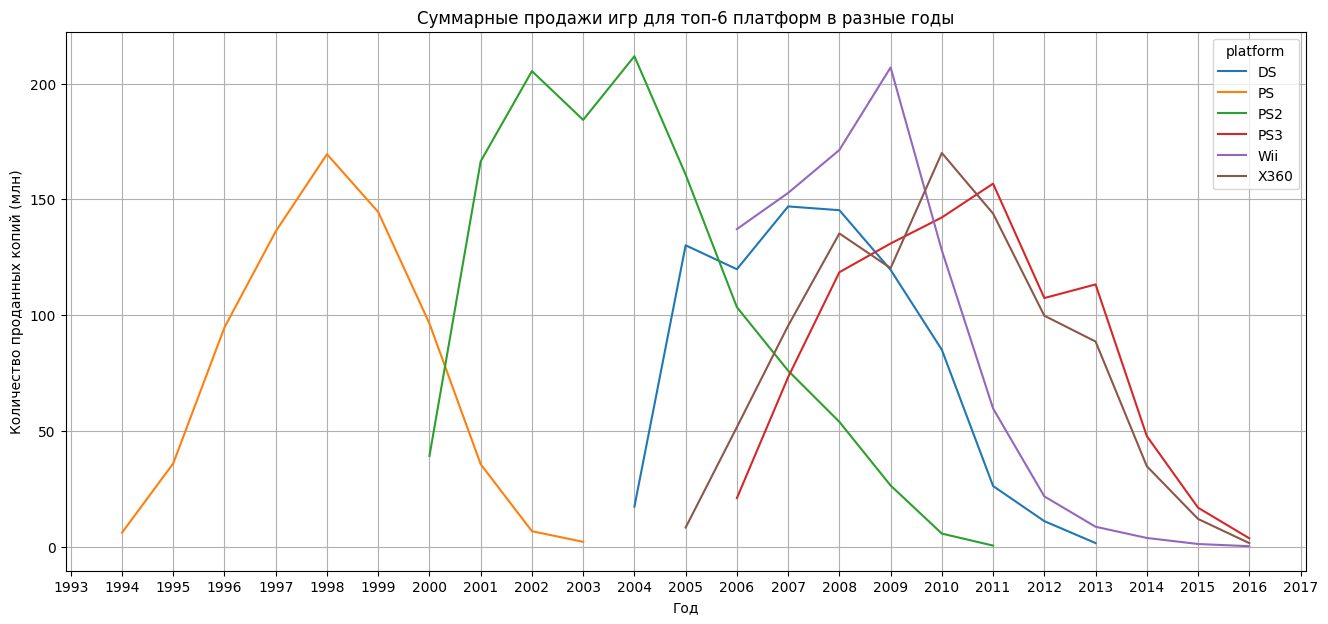

In [54]:
top_six_platform.pivot_table(index='year_of_release', columns='platform', \
values='total_sales', aggfunc='sum').plot(figsize=(16,7))
plt.locator_params(axis='x', nbins= 30)
plt.grid(which='major')
plt.title('Суммарные продажи игр для топ-6 платформ в разные годы')
plt.xlabel('Год')
plt.ylabel('Количество проданных копий (млн)')
plt.show()

**3.10** Как видно из графика, каждая платформа имеет жизненный цикл в 9-12 лет. 


Все платформы имеют пиковые значения приблизительно в середине своих периодов. Это логично: постепенно нарастает популярность платформы, а затем она идёт на спад, так как более новые версии платформ заменяют текущие. 

Выбивается из этого списка платформа `PS2`, которая держала относительно стабильную популярность на протяжении 5 лет (имея два пика), и лишь затем она пошла на спад.

Также интересна платформа `Wii`, которая уже на самом старте показала большое количество продаж (около 140 млн копий).

И именно эти 2 платформы (`PS2` и `Wii`) имели самые большие пиковые значения (свыше 200 млн копий проданных игр).

Также отметим, что среди рассматриваемых платформ нет тех, которые находятся на пике сейчас. Скорее всего, они ещё не успели нарастить такое количество продаж, чтобы попасть в топ-6. Их успех будет объективно оценён только после прохождения всего жизненного цикла. 

**3.11** Теперь **создадим датафрейм с актуальным периодом, который будем рассматривать для дальнейшего прогнозирования на 2017 год**. 

In [55]:
games_actual = games.query('year_of_release >= 2014').reset_index(drop=True)
games_actual.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
1,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
2,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
3,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
4,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98
5,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
6,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
7,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,3.27,1.37,2.43,0.48,NaN,NaN,NaN,7.55
8,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,NaN,7.39
9,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,M,7.17


**3.12** Рассмотрим, какие платформы лидируют по продажам, растут или падают.

Для этого построим сводную таблицу с платформами по годам.

In [56]:
games_actual_sales = games_actual.pivot_table(index='platform', columns='year_of_release', values='total_sales', aggfunc='sum')
games_actual_sales

year_of_release,2014,2015,2016
platform,,,
3DS,43.76,27.78,15.14
PC,13.28,8.52,5.25
PS3,47.76,16.82,3.60
PS4,100.00,118.90,69.25
PSP,0.24,0.12,NaN
PSV,11.90,6.25,4.25
Wii,3.75,1.14,0.18
WiiU,22.03,16.35,4.60
X360,34.74,11.96,1.52


**3.13** Всего в рассматриваемом периоде действуют 10 платформ. Сразу стоит отметить относительно низкие показатели за 2016 год. Можно сделать вывод, что в исходном датафрейме есть данные не за весь год, поэтому в анализе платформ будем с основном ориентироваться на данные за 2014-2015 годы. 

- Видно, что платформы `PC`, `PS3`, `PSP`, `PSV`, `Wii`, `X360` заканчивают или уже закончили свой жизненный цикл. Их показатели стремительно идут на спад. 
- Есть явные платформы, которые находятся на пике или приближаются к пику своей популярности: `PS4` и `XOne`.
- И есть 2 платформы, которые являются неодозначными: они постепенно идут на спад, но `3DS` имеет ещё отосительно высокую популярность, а `WiiU` имеет достаточно низкий спад за 2014-2015 годы.

**3.14** Для визуализации данных построим график «ящик с усами» по количеству проданых игр на разных платформах за актуальный период.

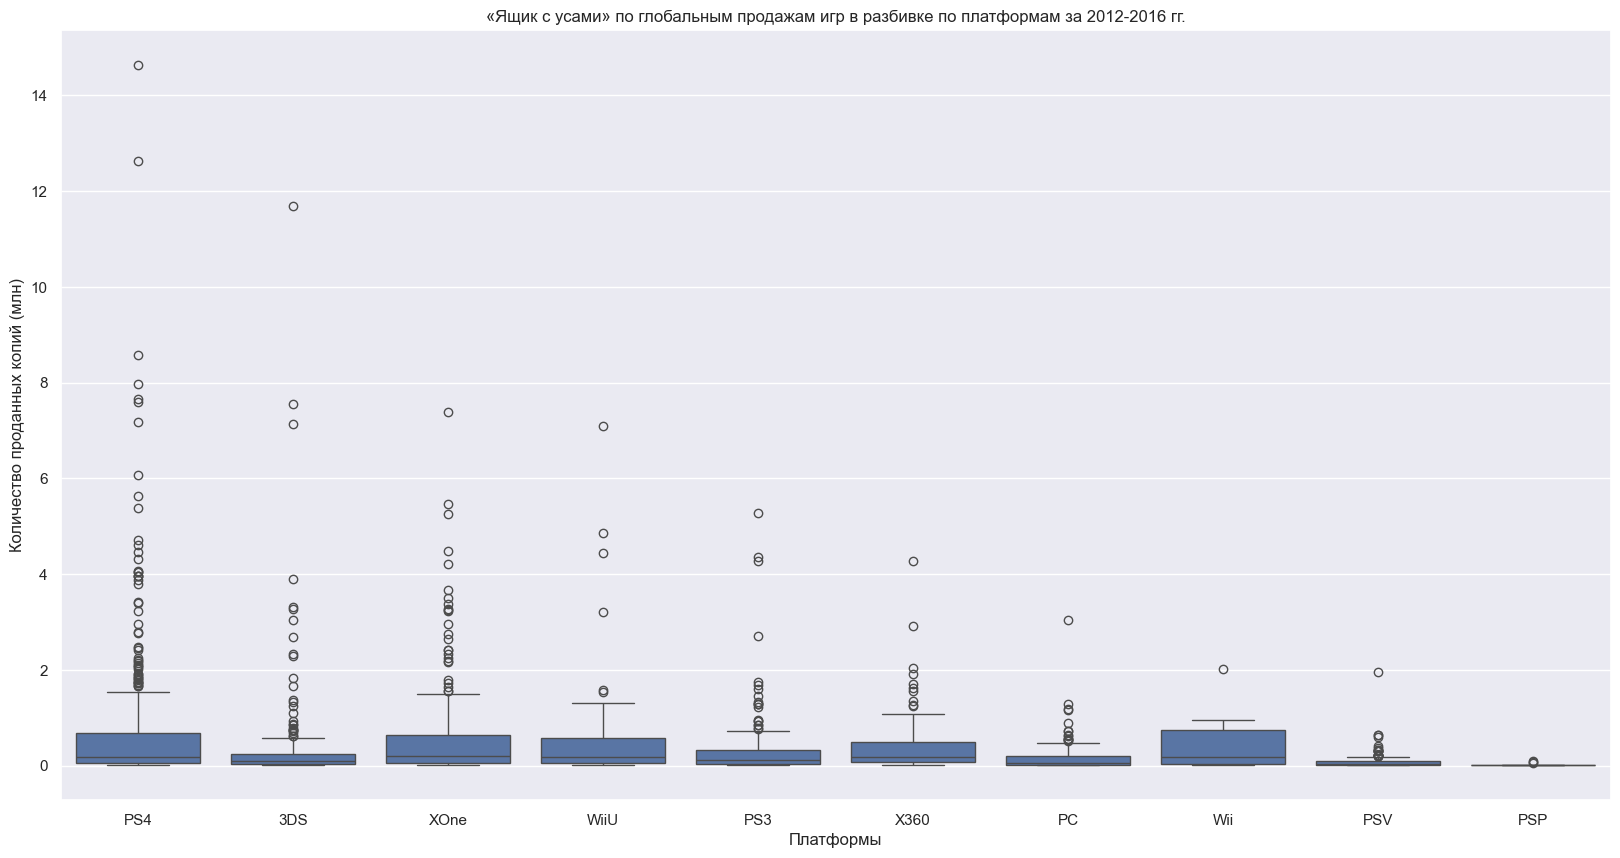

In [58]:
sns.boxplot(y='total_sales', x='platform', data=games_actual)
sns.set(rc={'figure.figsize':(20,10)})
plt.title('«Ящик с усами» по глобальным продажам игр в разбивке по платформам за 2012-2016 гг.')
plt.xlabel('Платформы')
plt.ylabel('Количество проданных копий (млн)')
plt.show()

**3.15** Как мы видим из графика, в данных много экстремально высоких значений, что затрудняет анализ данных. Уберём значения, выходящие за "усы" для лучшей визуализации.

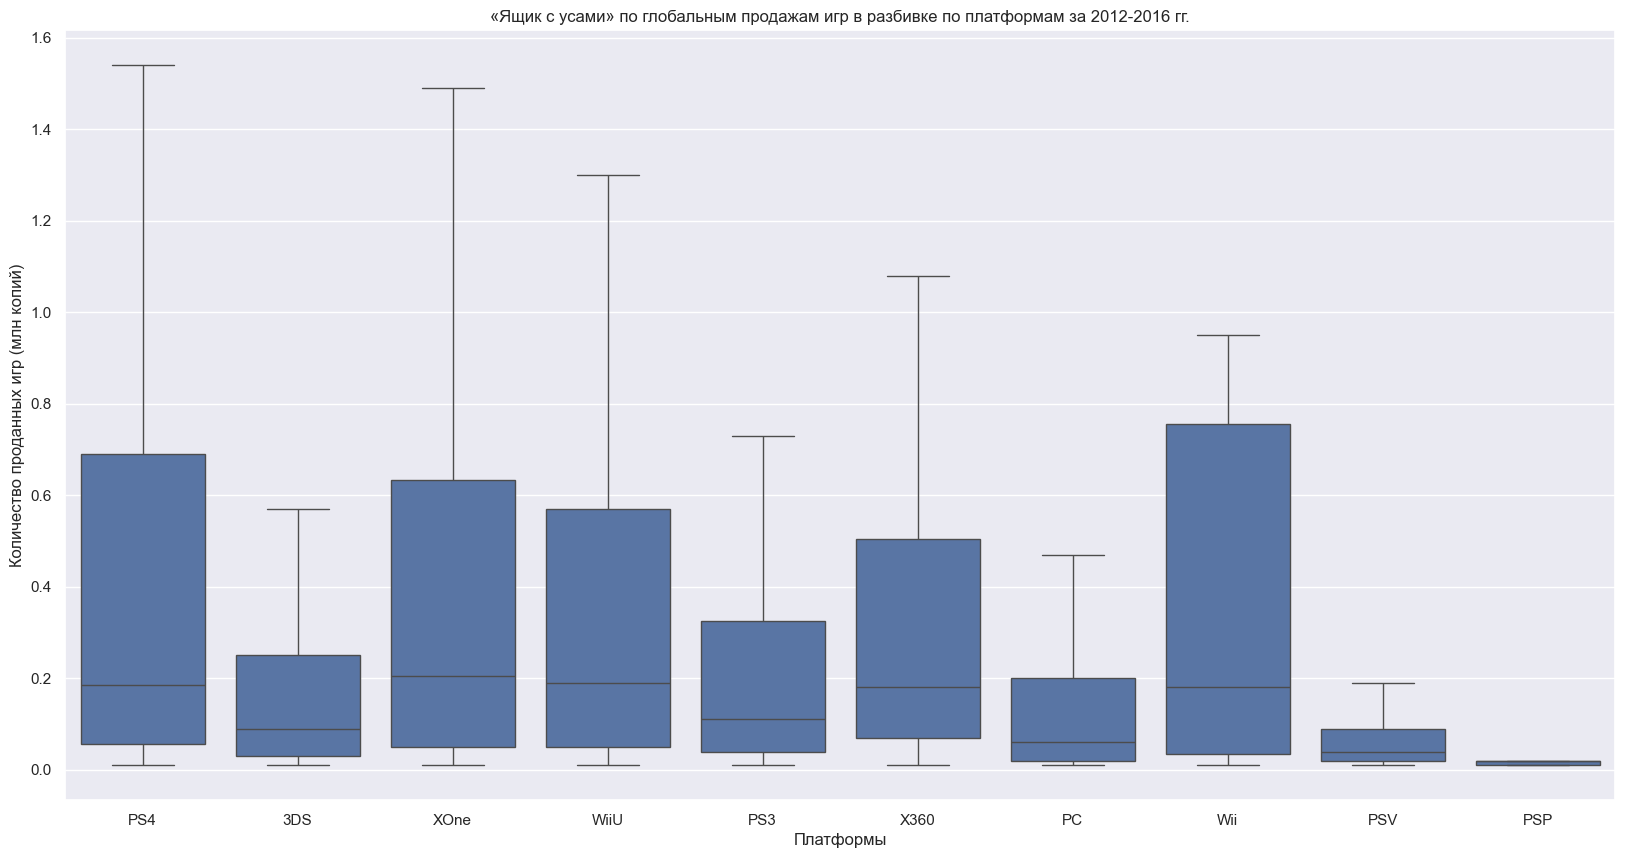

In [59]:
sns.boxplot(y='total_sales', x='platform', data=games_actual, showfliers=False)
sns.set(rc={'figure.figsize':(15,10)})
plt.title('«Ящик с усами» по глобальным продажам игр в разбивке по платформам за 2012-2016 гг.')
plt.xlabel('Платформы')
plt.ylabel('Количество проданных игр (млн копий)')
plt.show()

**3.16** Из графика мы видим, что в расматриваемом периоде стабильно много продалось игр `для платформы Wii`. Можно сказать, что это достаточно устойчивая платформа, так как из первого графика с выбросами мы видим, что выбросов по сравнению с другими популярными платформами почти нет. Однако сводная таблица показывает, что данная платформа завершает свой жизненный цикл.

Также можно отметить `PS4`, `XOne` и `WiiU`, которые тоже имели много продаж и принимают достаточно близкие значения между 1-м и 3-м квартилями. Интересно, что при этом данные платформы находятся на разных этапах жизненного цикла и имеют разное общее количество продаж (исходя из сводной таблицы). Так, `PS4` и `XOne` в рассматриваемом периоде находятся или приближаются к пику своей популярности, и мы можем понять, что платформы имеют более высокие продажи за счёт большого количества выбросов (скорее всего, такие высокие точечные продажи объясняются выходами эксклюзивных игр класса AAA для этих платформ). В это же время продажи для `WiiU` падают с каждым годом и являются более стабильными (имеют меньше выбросов). Можно сделать вывод, что `PS4` и `XOne` являются одними из лидеров продаж за счёт эксклюзивных игр, а в периоды отсутствия таковых показатель продаж для этих платформ немного выше значений `WiiU`. Так что по общему анализу можно сказать, что `PS4` и `XOne` более перспективные платформы.


Про наличие возможных эксклюзивов, из-за которых появляются высокие выбросы, можно сказать и о платформе `3DS`.

Вообще выбросы и то, что на каждой платформе нижняя граница достаточно близка к нулю, могут указывать на некую событийность в продажах игр. То есть продажи часто зависят от той игры, которая выходит.

Явно непривлекательными являются платформы `PC`, `PSP`, `PSV`, `3DS`, `PS3` из-за низких показателей продаж.

Таким образом, мы бы советовали рассматривать для кампании платформы `PS4`, `XOne` и `WiiU`.

**3.17** Теперь посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Для первого анализа возьмём платформу, которая находится или приближается к пику своего жизненного цикла и при этом имеет самое высокое количество продаж: `PS4`.

Построим для неё диаграмму рассеяния и посчитаем корреляцию между отзывами (критиков и пользователей) и продажами.

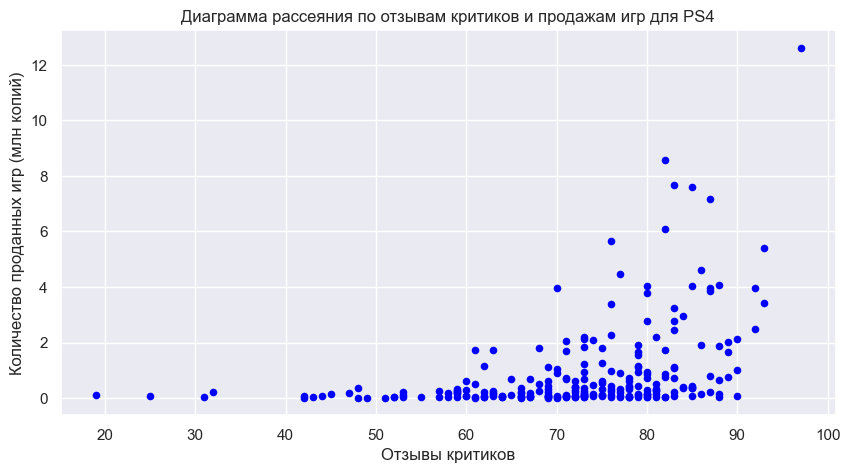

In [61]:
games_actual.query('platform == "PS4"').plot(x='critic_score', y='total_sales', kind='scatter', color='blue', figsize=(10,5))
plt.title('Диаграмма рассеяния по отзывам критиков и продажам игр для PS4')
plt.xlabel('Отзывы критиков')
plt.ylabel('Количество проданных игр (млн копий)')
plt.show()

In [63]:
print(games_actual.query('platform == "PS4"')['critic_score'].corr(games_actual['total_sales']))

0.4026614106810409


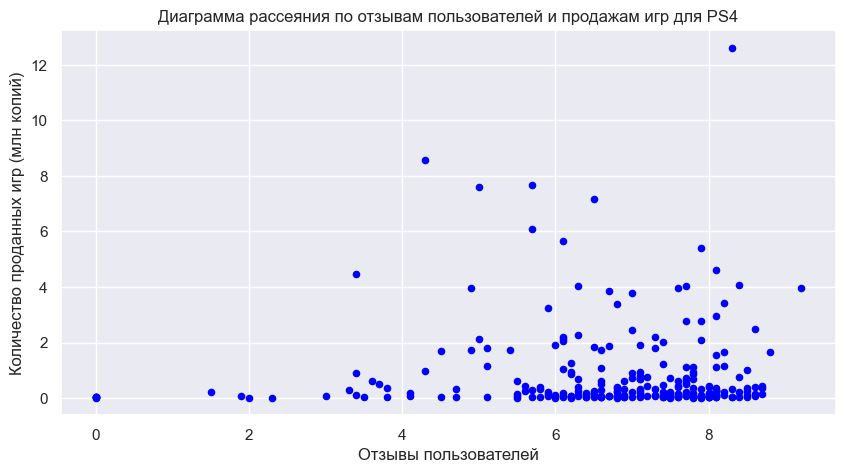

In [65]:
games_actual.query('platform == "PS4"').plot(x='user_score', y='total_sales', kind='scatter', color='blue', figsize=(10,5))
plt.title('Диаграмма рассеяния по отзывам пользователей и продажам игр для PS4')
plt.xlabel('Отзывы пользователей')
plt.ylabel('Количество проданных игр (млн копий)')
plt.show()

In [66]:
print(games_actual.query('platform == "PS4"')['user_score'].corr(games_actual['total_sales']))

0.018961924629169815


**3.18** В целом мы видим, что корреляция очень низкая и что оценки как критиков, так и пользователей не сильно влияют на количество проданных игр для PS4. Например, при низких оценках пользователей у игры могут быть достаточно высокие продажи. 

Одной из причин такой низкой зависимости может быть тот факт, что основные продажи долгожданных игр приходятся на первые дни релиза, когда еще не сформированы оценки, то есть оценка игры производится после её покупки большим количеством пользователей. 

**3.19** Теперь построим диаграммы рассеяния и посчитаем корреляции для других платформ за актуальный период. 

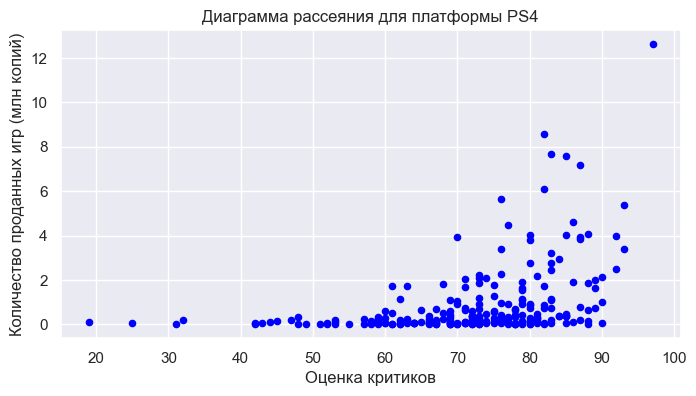

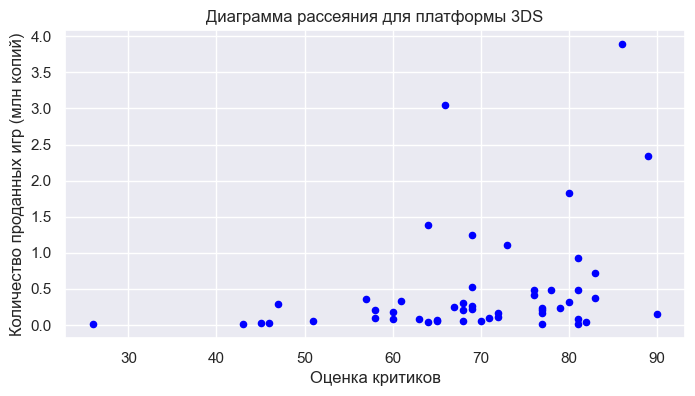

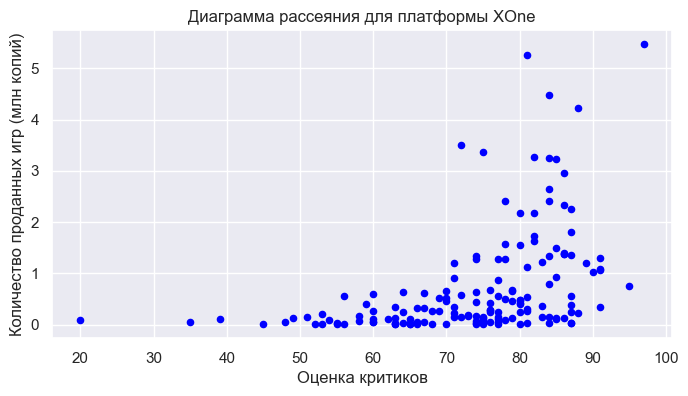

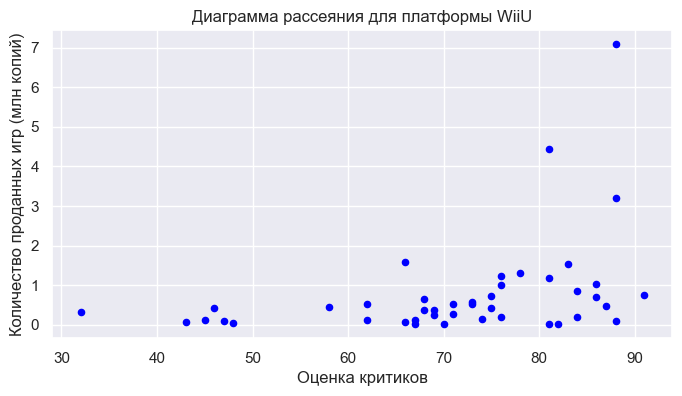

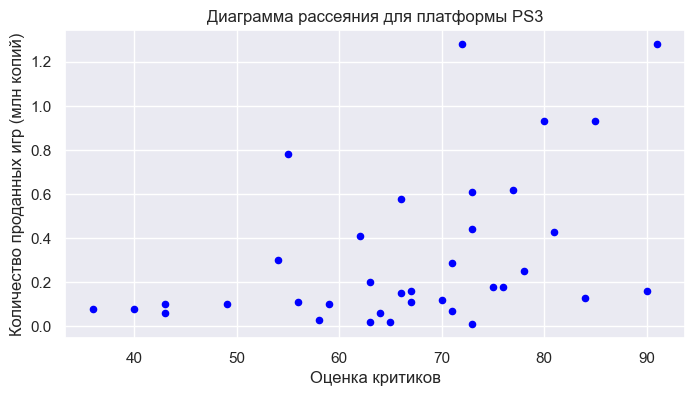

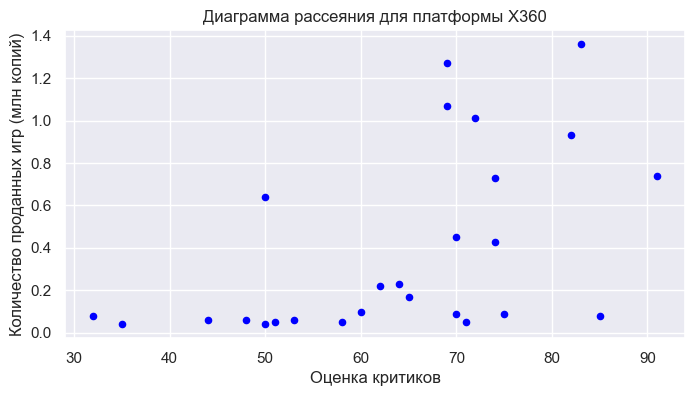

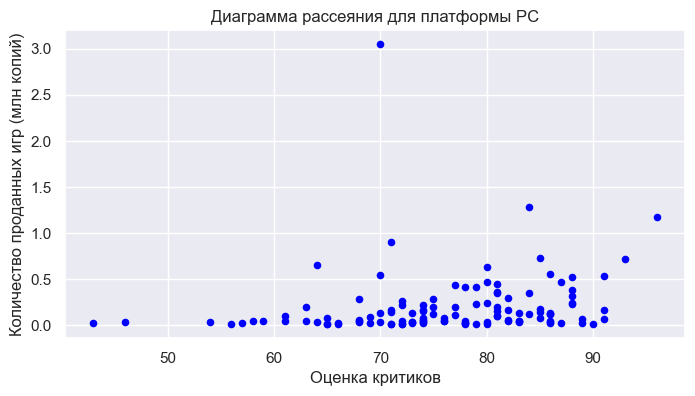

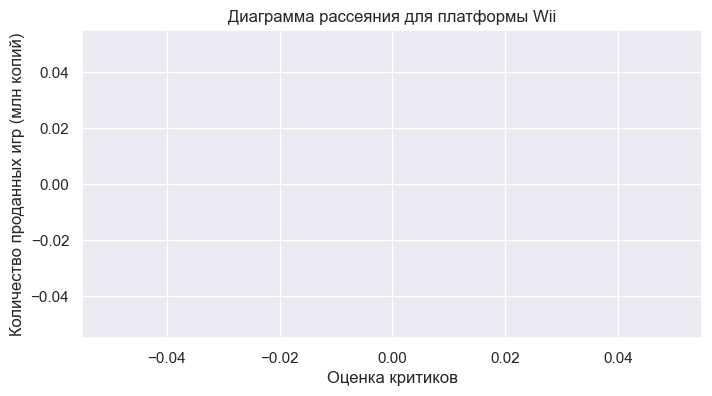

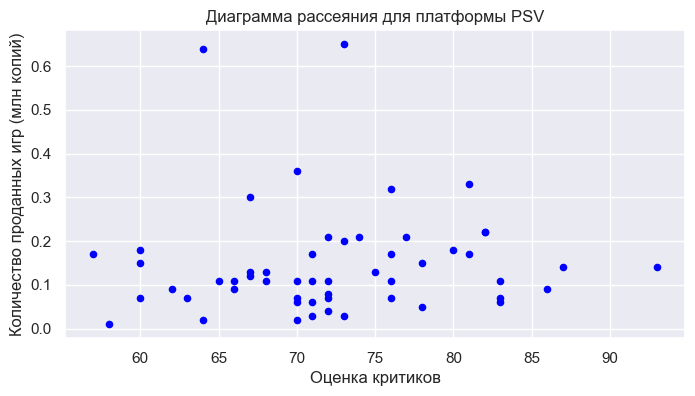

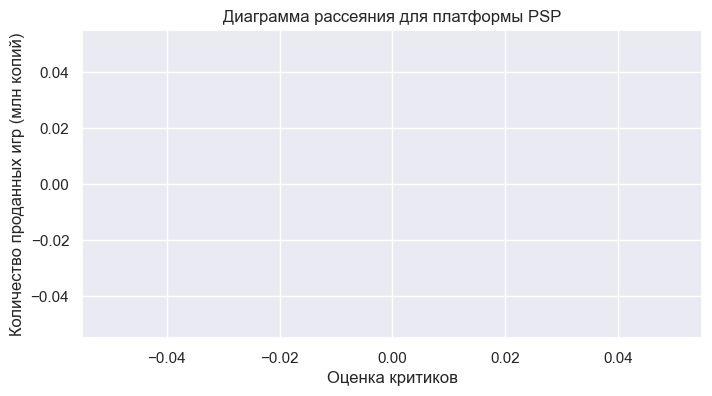

In [68]:
for i in games_actual['platform'].unique():
    games_actual.loc[(games_actual['platform'] == i)].plot(x='critic_score', 
                                                           y='total_sales', 
                                                           kind='scatter', 
                                                           color='blue', 
                                                           figsize=(8,4))
    plt.title(f'Диаграмма рассеяния для платформы {i}')
    plt.xlabel('Оценка критиков')
    plt.ylabel('Количество проданных игр (млн копий)')
    plt.show()

In [69]:
for i in games_actual['platform'].unique():
    print(i,' = ',games_actual.loc[games_actual['platform'] == i]['critic_score'].corr(games_actual['total_sales']))

PS4  =  0.4026614106810409
3DS  =  0.314117492869051
XOne  =  0.42867694370333187
WiiU  =  0.370201412480884
PS3  =  0.44657460493190704
X360  =  0.5257228356581523
PC  =  0.17463413769350036
Wii  =  nan
PSV  =  0.04266490657009526
PSP  =  nan


**3.20** Как мы видим, для других платформ картина примерно такая же, как и для платформы PS4: низкая корреляция. Что подтверждает, что оценки не сильно влияют на продажи игр и наоборот. 

Стоит также отметить, что для платформ `PSP` и `Wii` не получилось посчитать корреляцию из-за отсутствия оценок (видно из диаграмм). 

Проведём то же исследование, исходя из оценок пользователей. 

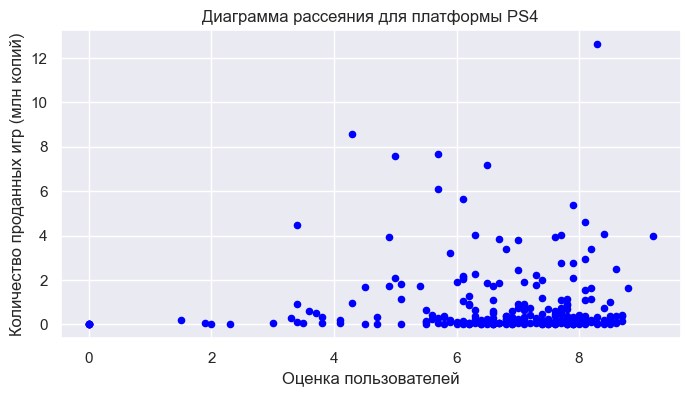

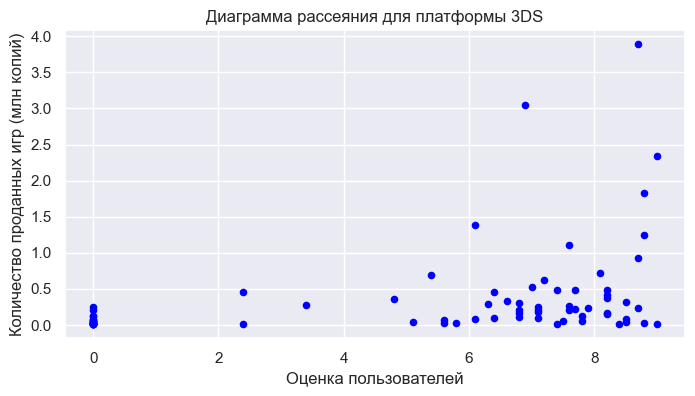

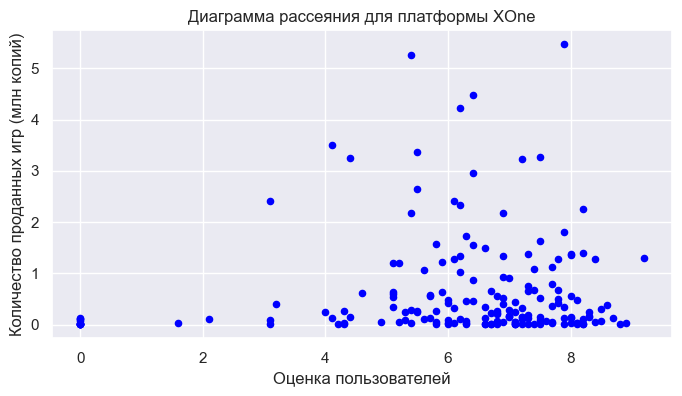

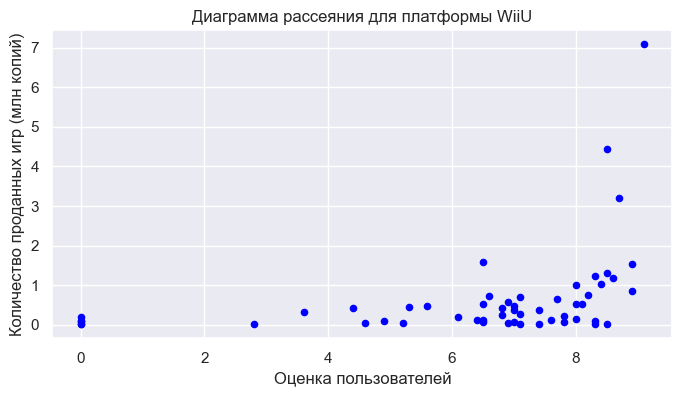

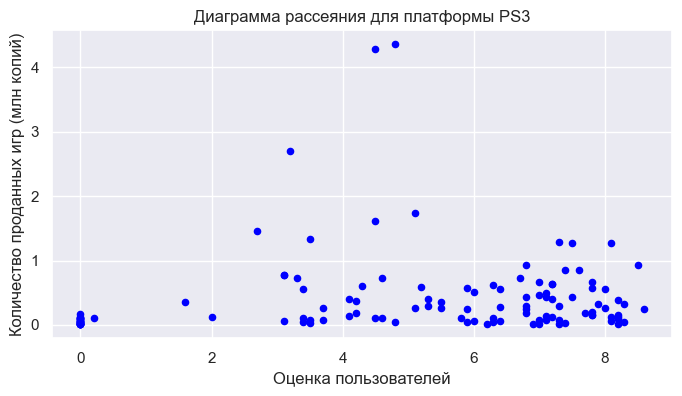

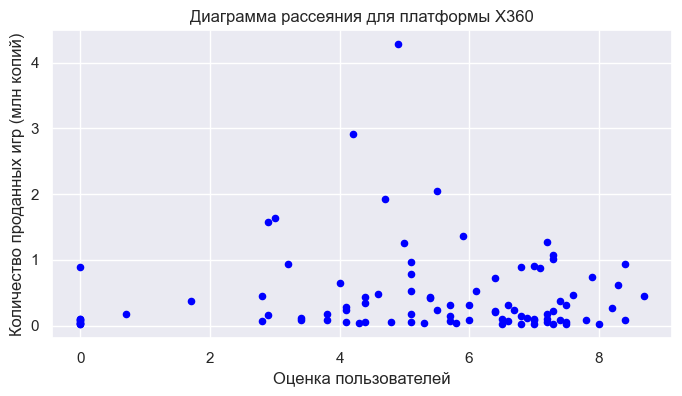

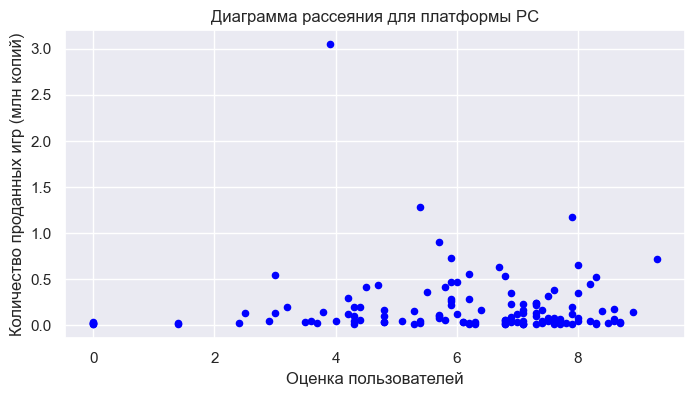

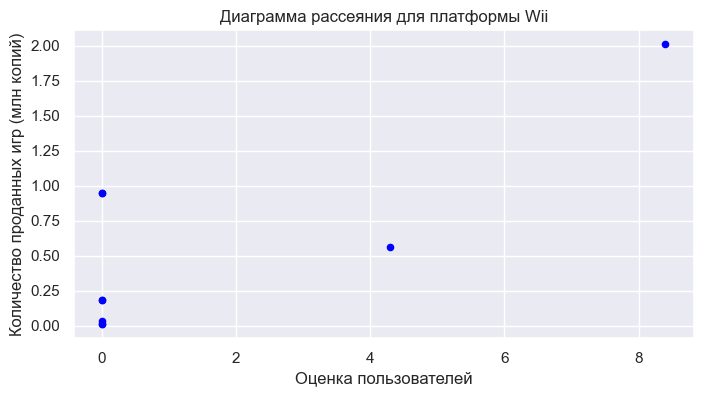

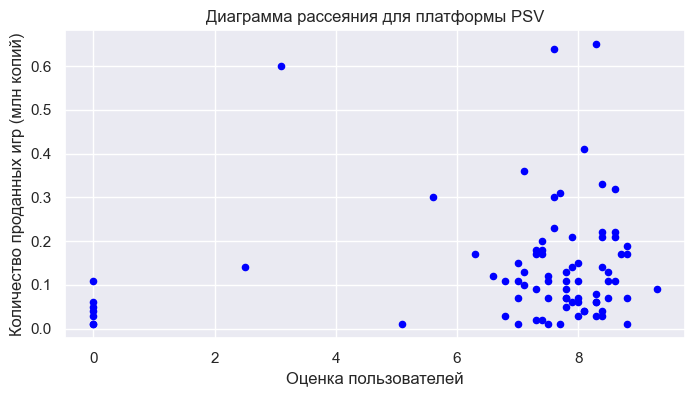

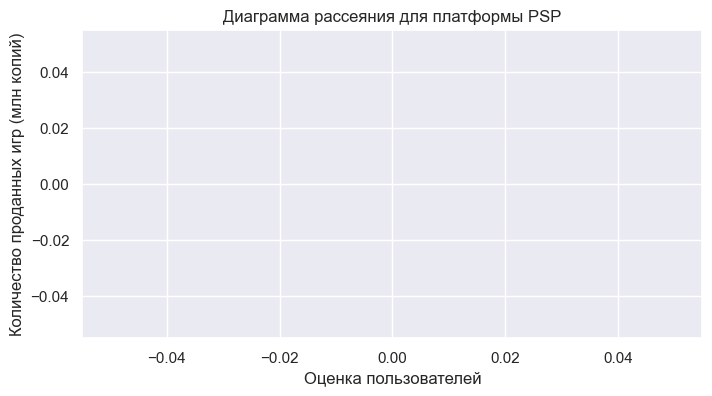

In [71]:
for i in games_actual['platform'].unique():
    games_actual.loc[(games_actual['platform'] == i)].plot(x='user_score', 
                                                           y='total_sales', 
                                                           kind='scatter', 
                                                           color='blue', 
                                                           figsize=(8,4))
    plt.title(f'Диаграмма рассеяния для платформы {i}')
    plt.xlabel('Оценка пользователей')
    plt.ylabel('Количество проданных игр (млн копий)')
    plt.show()

In [72]:
for i in games_actual['platform'].unique():
    print(i,' = ',games_actual.loc[games_actual['platform'] == i]['user_score'].corr(games_actual['total_sales']))

PS4  =  0.018961924629169815
3DS  =  0.34586243970837477
XOne  =  0.07607338859238692
WiiU  =  0.3518952473362983
PS3  =  0.1138376265969687
X360  =  0.01942078848246694
PC  =  0.0035928245777211653
Wii  =  0.7775836195730244
PSV  =  0.1285224992534306
PSP  =  nan


**3.21** Здесь показатели корреляции ещё ниже, чем при исследовании по оценкам критиков. Исключением является платформа `Wii`, однако по ней очень мало оценок, поэтому данные можно считать необъективными. 

Стоит отметить, что в основном корреляция по оценкам критиков выше, чем по оценкам пользователей. Возможно, оценки критиков считаются более экспертыми и в более долгосрочном периоде больший процент игроков ориентируется именно на оценки экспертов. Однако в обоих случаях показатель всё равно невысок. Так что можно сказать, что **нет прямой зависимости между оценками и продажами игр**. 

**3.22** Теперь посмотрим на общее распределение игр по жанрам. Для начала построим диаграмму с количеством игр в исследуемый период. 

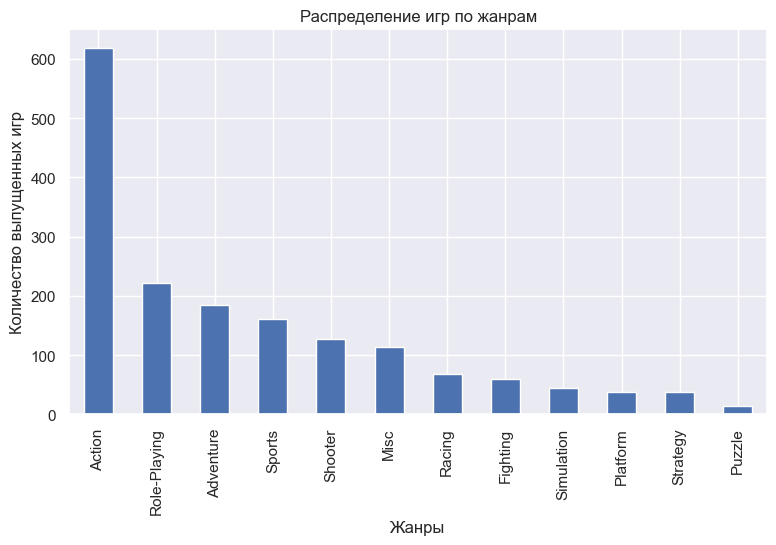

In [74]:
games_actual.groupby('genre')['name'].count().sort_values(ascending=False).plot(kind='bar', figsize=(9,5))
plt.title('Распределение игр по жанрам')
plt.xlabel('Жанры')
plt.ylabel('Количество выпущенных игр')
plt.show()

**3.23** Первое место (более 600 игр) занимает жанр `Action`. На втором месте (уже чуть более 200 выпущенных игр) стоит жанр `Role-Playing`. И третье место (около 180 игр) у жанр `Adventure`. Доля остальных жанров достаточно низкая. Самый непопулярный жанр - `Puzzle`. 

Теперь посмотрим, какой жанр потенциально приносит больше всего прибыли. Рассчитаем как общее количество проданных игр определённого жарна, так и среднее количество продаж каждой игры в своём жанре. 

In [75]:
genre_profit = games_actual.pivot_table(index='genre', values='total_sales', aggfunc=['sum', 'mean'])
genre_profit.columns=['Общие продажи в млн копий', 'Средние продажи в млн копий']
genre_profit.sort_values('Общие продажи в млн копий', ascending=False)

,Общие продажи в млн копий,Средние продажи в млн копий
genre,,
Action,199.36,0.322068
Shooter,170.94,1.335469
Sports,109.48,0.680000
Role-Playing,101.44,0.459005
Misc,37.55,0.332301
Fighting,28.22,0.470333
Racing,27.52,0.398841
Platform,18.09,0.476053
Adventure,17.55,0.094865


In [76]:
genre_profit.sort_values('Средние продажи в млн копий', ascending=False)

,Общие продажи в млн копий,Средние продажи в млн копий
genre,,
Shooter,170.94,1.335469
Sports,109.48,0.680000
Platform,18.09,0.476053
Fighting,28.22,0.470333
Role-Playing,101.44,0.459005
Racing,27.52,0.398841
Misc,37.55,0.332301
Action,199.36,0.322068
Simulation,13.13,0.298409


**3.24** `Action` остаётся на первом по общему количеству продаж, однако мы видим, что одна игра в среднем продаётся в количестве 322 000 копий (8 место в рейтинге). То есть высокое количество продаж достигается за счёт количества выпускаемых игр. 

Интересны значения `Adventure` (топ-3 по кол-ву выпускаемых игр). Как видно из сводной таблицы, хоть выпускают много игр этого жанра, но продажи таких игр крайне малы. Возможно, подавляющее большинство Adventure выпускают разработчики-любители (игр подобного класса на рынке много, но аудитория у них небольшая). 

Жанр `Role-Playing` можно назвать стабильным. Он является вторым по количеству выпускаемых игр и при этом приносит относительно высокую прибыль (4-5 место в рейтинге продаж). 

Стоит также отметить жанр `Shooter`, который стоит на 5-м месте среди всех выпускаемых игр, однако стоит на первом месте по среднему количеству продаж и на втором месте по общему количеству продаж. Это свидетельствует о высокой популярности данного жанра. 

Также в топ-5 по среднему кол-ву продаж, помимо `Shooter` и `Role-Playing`, входят `Sports`, `Platform` и `Fighting` (хотя доля игр этих жанров среди всех выпускаемых игр невелика).

Как итог, для поиска потенциально прибильных жанров рекомендуется учитывать среднее количество продаж игр определённого жанра, так как количество выпущенных игр конкретного жанра не всегда свидетельствует о его прибыльности и популярности.

### Вывод

В рамках исследовательской работы был определён **актуальный период для прогнозирования: 2014-2016 годы**. Также было определено, что **каждая платформа имеет жизненный цикл в 9-12 лет** с пиковыми значениями популярности примерно в середине цикла.


После чего по актуальному периоду были сделаны средующие выводы:

1. В 2014-2016 годах действовали 10 платформ. Среди них есть явные платформы, которые находятся на пике или приближаются к пику своей популярности: `PS4` и `XOne`. И есть 2 платформы, которые являются неодозначными: они постепенно идут на спад, но `3DS` имеет ещё относительно высокую популярность, а `WiiU` имеет достаточно низкий спад за 2014-2015 годы.

2. По показателям графика "ящик с усами" также было принято решение определить платформу `3DS` в непопулярную категорию. Как итог, были выделены 3 перспективные платформы на 2017 год: `PS4`, `XOne` и `WiiU`.

3. Было определено, что оценки как критиков, так и пользователей не сильно влияют на продажи игр (исследование показало низкую корреляцию). 

4. Также мы выявили, что для поиска потенциально прибыльных жанров рекомендуется учитывать среднее количество продаж игры определённого жанра, так как количество выпущенных игр конкретного жанра не всегда свидетельствует о прибыльности и популярности. Так, например, жанр `Actoin` стоит на первом месте по количеству выпускаемых игр и по общему количеству продаж, однако одна игра в среднем продаётся в количестве 322 000 копий (8 место в рейтинге). То есть высокое количество продаж достигается лишь за счёт количества выпускаемых игр.

В топ-5 по среднему кол-ву продаж входят следующие жанры: `Shooter`, `Sports`, `Platform`, `Fighting` и `Role-Playing` соответственно (при этом доля некоторых этих жанров среди всех жарнов достаточно низкая).


<a id="4"></a>
## Составление портрета пользователя каждого региона

**4.1** Определим для пользователя каждого региона (NA, EU, JP):

- Самые популярные платформы (топ-5).
- Самые популярные жанры (топ-5).
- Влияет ли рейтинг ESRB на продажи в отдельном регионе.

Для начала повторно выведем таблицу с актуальными данными на экран.

In [77]:
games_actual.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
1,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
2,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
3,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
4,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98
5,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
6,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
7,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,3.27,1.37,2.43,0.48,NaN,NaN,NaN,7.55
8,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,NaN,7.39
9,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,M,7.17


**4.2** Теперь **найдём топ-5 игровых платформ для каждого региона, а остальные платформы запишем в строку `other`**. Так как нам надо повторять один и тот же код для каждого региона, было решено написать функцию, которая поможет рассчитать необходимые значения и построить сводную таблицу. 

In [78]:
def top_rating(region, value):
    
    regions = region + '_sales'

    pivot = games_actual.pivot_table(index=value, values=regions, aggfunc='sum').sort_values(by=regions, ascending=False)
    
    top_rating = pivot.head()
    
    other = pivot[regions].sum() - top_rating[regions].sum()
    
    other_rating = pd.DataFrame({regions:[other]}, index=['other'])
    
    rating_all = pd.concat([top_rating, other_rating])
    
    rating_all = rating_all.reset_index()
    
    rating_all = rating_all.rename(columns={'index': value})
                                   
    return rating_all


In [79]:
rating_na_platform = top_rating('na', 'platform')
rating_na_platform

,platform,na_sales
0,PS4,98.61
1,XOne,81.27
2,X360,28.30
3,3DS,22.64
4,PS3,22.05
5,other,31.19


In [80]:
rating_eu_platform = top_rating('eu', 'platform')
rating_eu_platform

,platform,eu_sales
0,PS4,130.04
1,XOne,46.25
2,PS3,25.54
3,PC,17.97
4,3DS,16.12
5,other,34.76


In [81]:
rating_jp_platform = top_rating('jp', 'platform')
rating_jp_platform

,platform,jp_sales
0,3DS,44.24
1,PS4,15.02
2,PSV,14.54
3,PS3,11.22
4,WiiU,7.31
5,other,0.76


**4.3** Построим диаграммы, показывающие процентное соотношение популярности платформ в каждом регионе. 

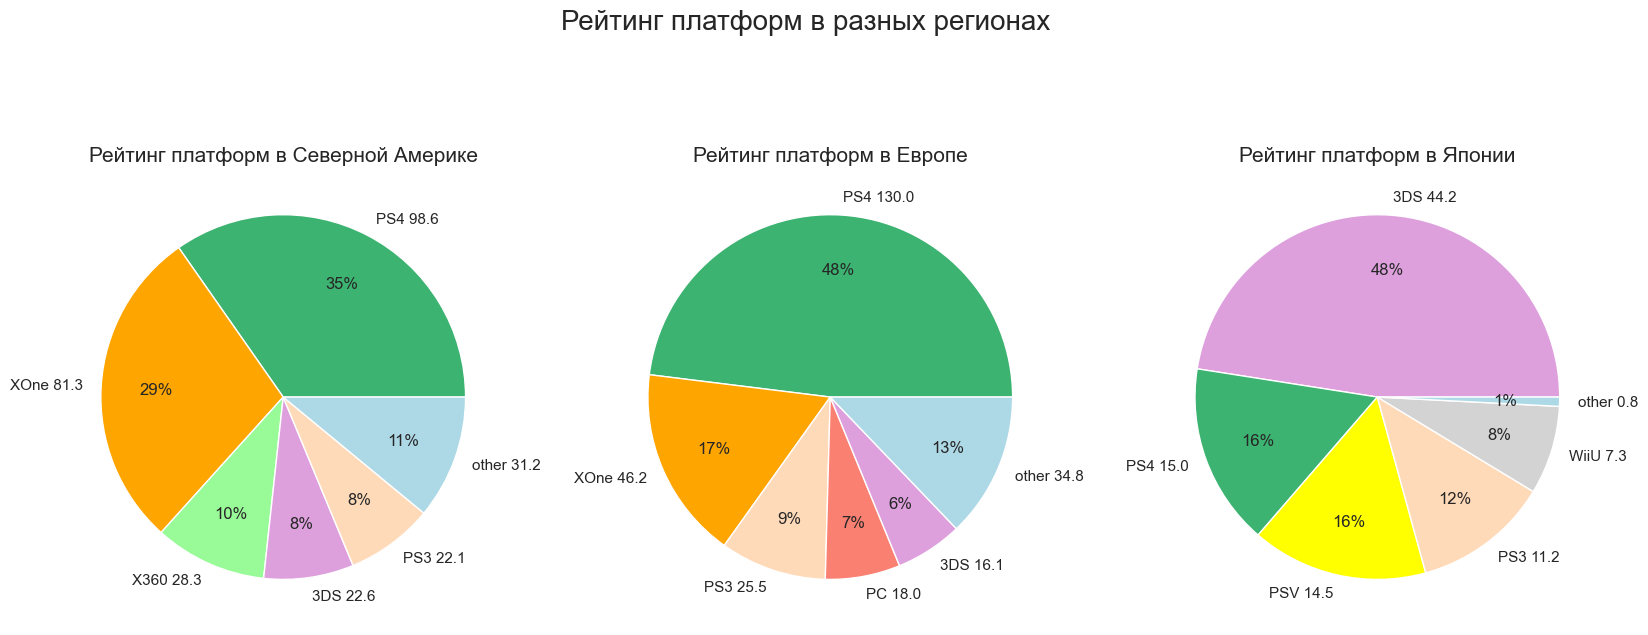

In [92]:
fig, axes = plt.subplots(1, 3, figsize=(20,8))
fig.suptitle('Рейтинг платформ в разных регионах', fontsize=20)

colors = {'3DS': 'plum', 'PC': 'salmon', 'PS4': 'mediumseagreen', 'PSV': 'yellow', 'WiiU': 'lightgray', 'XOne': 'orange', 'PS3': 'peachpuff', 'X360': 'palegreen', 'other': 'lightblue'}

ax1 = plt.subplot(1, 3, 1)
sizes_na = rating_na_platform['na_sales'].values
labels_na = [f'{l} {s:1.1f}' for l, s in zip(rating_na_platform['platform'], sizes_na)]
rating_na_platform['na_sales'].plot(y='na_sales', kind='pie', autopct='%1.0f%%', pctdistance=0.7, 
                                    x=sizes_na, labels=labels_na, 
                                    colors=[colors[key] for key in rating_na_platform['platform']], legend=None)
plt.ylabel('')
plt.title('Рейтинг платформ в Северной Америке', size=15);

ax2 = plt.subplot(1, 3, 2)
sizes_eu = rating_eu_platform['eu_sales'].values
labels_eu = [f'{l} {s:1.1f}' for l, s in zip(rating_eu_platform['platform'], sizes_eu)]
rating_eu_platform['eu_sales'].plot(y='eu_sales', kind='pie', autopct='%1.0f%%', pctdistance=0.7, 
                                    x=sizes_eu, labels=labels_eu,
                                    colors=[colors[key] for key in rating_eu_platform['platform']], legend=None)
plt.ylabel('')
plt.title('Рейтинг платформ в Европе', size=15);

ax3 = plt.subplot(1, 3, 3)
sizes_jp = rating_jp_platform['jp_sales'].values
labels_jp = [f'{l} {s:1.1f}' for l, s in zip(rating_jp_platform['platform'], sizes_jp)]
rating_jp_platform['jp_sales'].plot(y='jp_sales', kind='pie', autopct='%1.0f%%', pctdistance=0.7, 
                                    x=sizes_jp, labels=labels_jp, 
                                    colors=[colors[key] for key in rating_jp_platform['platform']], legend=None)
plt.ylabel(' ')
plt.title('Рейтинг платформ в Японии', size=15)
plt.show()

**4.4** Как видно из графиков, портреты пользователя из Северной Америки и Европы похожи. 

Пользователи Северной Америки и Европы в основном пользуются одними и теми же платформами: `PS4` и `XOne` (более 50% рынка). Хотя почти половина игроков Европы предпочитает `PS4` другим платформам, в то время как американцы почти в равных долях пользуются `PS4` и `XOne`. Популярность других платформ не сильно выражена у европейцев и американцев (каждая занимает до 10% от общего числа).

Около половины японцев предпочитают `3DS` (при этом он стоит на 4-5 месте на других рынках), а затем уже `PS4` и `PSV`. Стоит отметить, что платформа `WiiU`, которую мы выделили как стабильную по продажам, популярна только у японцев. 

Если сервис будет учитывать регионы, тогда:
- Для жителей Северной Америки и Европы рекомендуем ориентироваться на платформы `PS4` и `XOne`.
- Для японцев предпочтительной будет платформа `3DS`.

**4.5** Теперь проделаем те же расчёты с той же функцией, чтобы выявить топ-5 игровых жанров среди разных регионов. 

In [83]:
rating_na_genre = top_rating('na', 'genre')
rating_na_genre

,genre,na_sales
0,Shooter,79.02
1,Action,72.53
2,Sports,46.13
3,Role-Playing,33.47
4,Misc,15.05
5,other,37.86


In [84]:
rating_eu_genre = top_rating('eu', 'genre')
rating_eu_genre

,genre,eu_sales
0,Action,74.68
1,Shooter,65.52
2,Sports,45.73
3,Role-Playing,28.17
4,Racing,14.13
5,other,42.45


In [85]:
rating_jp_genre = top_rating('jp', 'genre')
rating_jp_genre

,genre,jp_sales
0,Role-Playing,31.16
1,Action,29.58
2,Fighting,6.37
3,Misc,5.61
4,Shooter,4.87
5,other,15.50


**4.6** Построим круговые диаграммы для визуализации. 

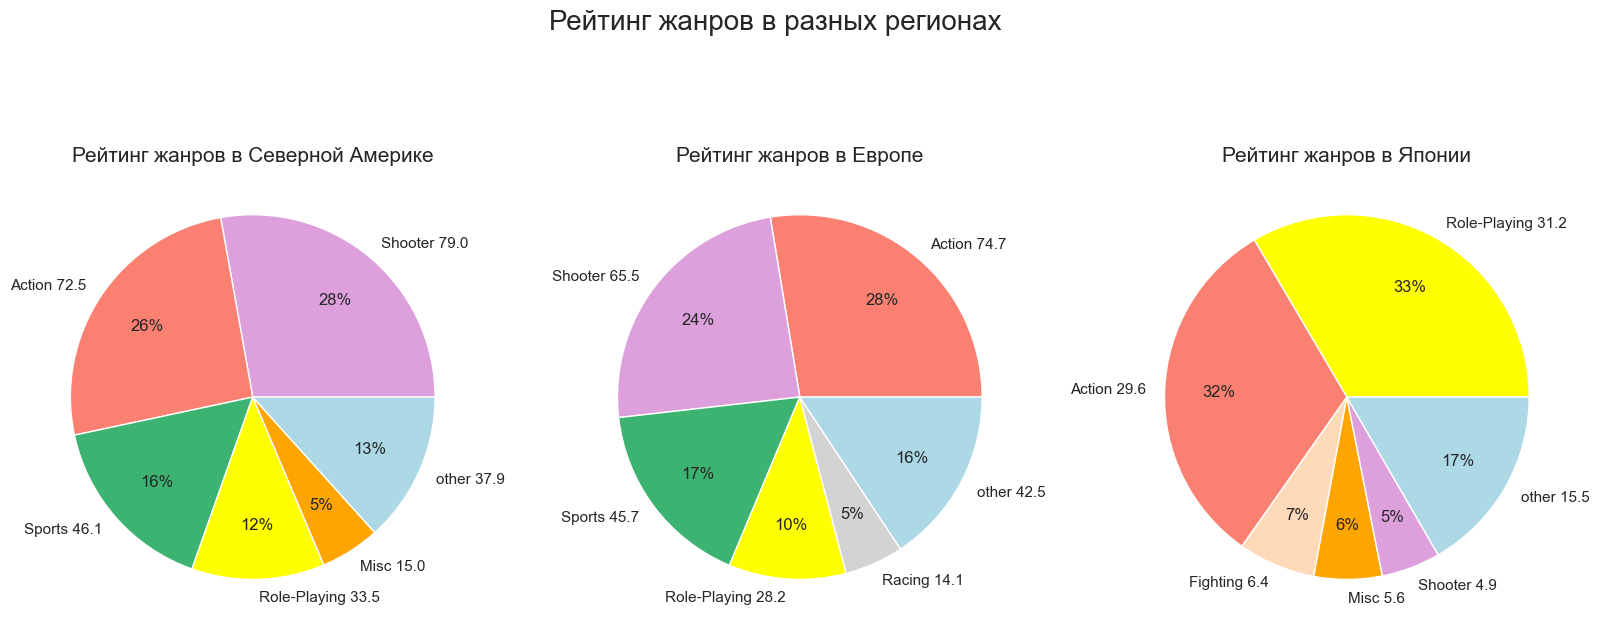

In [93]:
fig, axes = plt.subplots(1, 3, figsize=(20,8))
fig.suptitle('Рейтинг жанров в разных регионах', fontsize=20)

colors = {'Shooter': 'plum', 'Action': 'salmon', 'Sports': 'mediumseagreen', 'Role-Playing': 'yellow', 'Racing': 'lightgray', 'Misc': 'orange', 'Fighting': 'peachpuff', 'other': 'lightblue'}

ax1 = plt.subplot(1, 3, 1)
sizes_na = rating_na_genre['na_sales'].values
labels_na = [f'{l} {s:1.1f}' for l, s in zip(rating_na_genre['genre'], sizes_na)]
rating_na_genre['na_sales'].plot(y='na_sales', kind='pie', autopct='%1.0f%%', pctdistance=0.7, 
                                    x=sizes_na, labels=labels_na, 
                                    colors=[colors[key] for key in rating_na_genre['genre']], legend=None)
plt.ylabel('')
plt.title('Рейтинг жанров в Северной Америке', size=15);

ax2 = plt.subplot(1, 3, 2)
sizes_eu = rating_eu_genre['eu_sales'].values
labels_eu = [f'{l} {s:1.1f}' for l, s in zip(rating_eu_genre['genre'], sizes_eu)]
rating_eu_genre['eu_sales'].plot(y='eu_sales', kind='pie', autopct='%1.0f%%', pctdistance=0.7, 
                                    x=sizes_eu, labels=labels_eu,
                                    colors=[colors[key] for key in rating_eu_genre['genre']], legend=None)
plt.ylabel('')
plt.title('Рейтинг жанров в Европе', size=15);

ax3 = plt.subplot(1, 3, 3)
sizes_jp = rating_jp_genre['jp_sales'].values
labels_jp = [f'{l} {s:1.1f}' for l, s in zip(rating_jp_genre['genre'], sizes_jp)]
rating_jp_genre['jp_sales'].plot(y='jp_sales', kind='pie', autopct='%1.0f%%', pctdistance=0.7, 
                                    x=sizes_jp, labels=labels_jp, 
                                    colors=[colors[key] for key in rating_jp_genre['genre']], legend=None)
plt.ylabel(' ')
plt.title('Рейтинг жанров в Японии', size=15)
plt.show()

**4.7** Как видно из графиков, портреты пользователя Северной Америки и Европы очень похожи: первое и второе места среди жанров почти в равных долях занимают `Action` и `Shooter`, третье - `Sports`, а четвёртое `Pole-Playing`.

Японский рынок выглядит по-другому: на первом месте здесь `Role-Playing`, на втором `Action`, затем `Fighting`, `Misc`, `Shooter` .

Можно сказать, что жанр, который пользуется популярностью во всех странах, - это `Action`. Самым логичным было бы "поставить" на него, так как он имеет процент популярности 26-32% во всех странах, однако ранее мы выявили, что на процент общих продаж здесь влияет количество выпускаемых игр, а не средние продажи каждой игры. Следовательно, такой жанр может быть не самым прибыльным. Надо учитывать это факт при дальнейшем прогнозировании. 

Следовательно, рекомендуется выбирать жанр по региону. 
- Для жителей Северной Америки и Европы предпочтительными будут `Action` и `Shooter`
- Для жителей Японии - `Role-Playing` и `Action`.

**4.8** Применим ту же функцию подсчёта для определения топ-5 возрастного рейтинга в разных регионах. 

In [87]:
rating_na_ESRB = top_rating('na', 'rating')
rating_na_ESRB

,rating,na_sales
0,M,96.42
1,E,50.74
2,T,38.95
3,E10+,33.23
4,other,0.00


**4.9** Мы видим, что в датафрейме фигурирует всего 4 категории. Сладовательно, в `other` записывается нулевое значение. Удалим эту строку для таблицы `rating_na_ESRB` и последующих.

In [88]:
rating_na_ESRB = rating_na_ESRB.drop(labels = [4], axis = 0)
rating_na_ESRB

,rating,na_sales
0,M,96.42
1,E,50.74
2,T,38.95
3,E10+,33.23


In [89]:
rating_eu_ESRB = top_rating('eu', 'rating')
rating_eu_ESRB = rating_eu_ESRB.drop(labels = [4], axis = 0)
rating_eu_ESRB

,rating,eu_sales
0,M,93.44
1,E,58.06
2,T,34.07
3,E10+,26.16


In [90]:
rating_jp_ESRB = top_rating('jp', 'rating')
rating_jp_ESRB = rating_jp_ESRB.drop(labels = [4], axis = 0)
rating_jp_ESRB

,rating,jp_sales
0,T,14.78
1,E,8.94
2,M,8.01
3,E10+,4.46


**4.10** Построим круговые диаграммы для визуализации. 

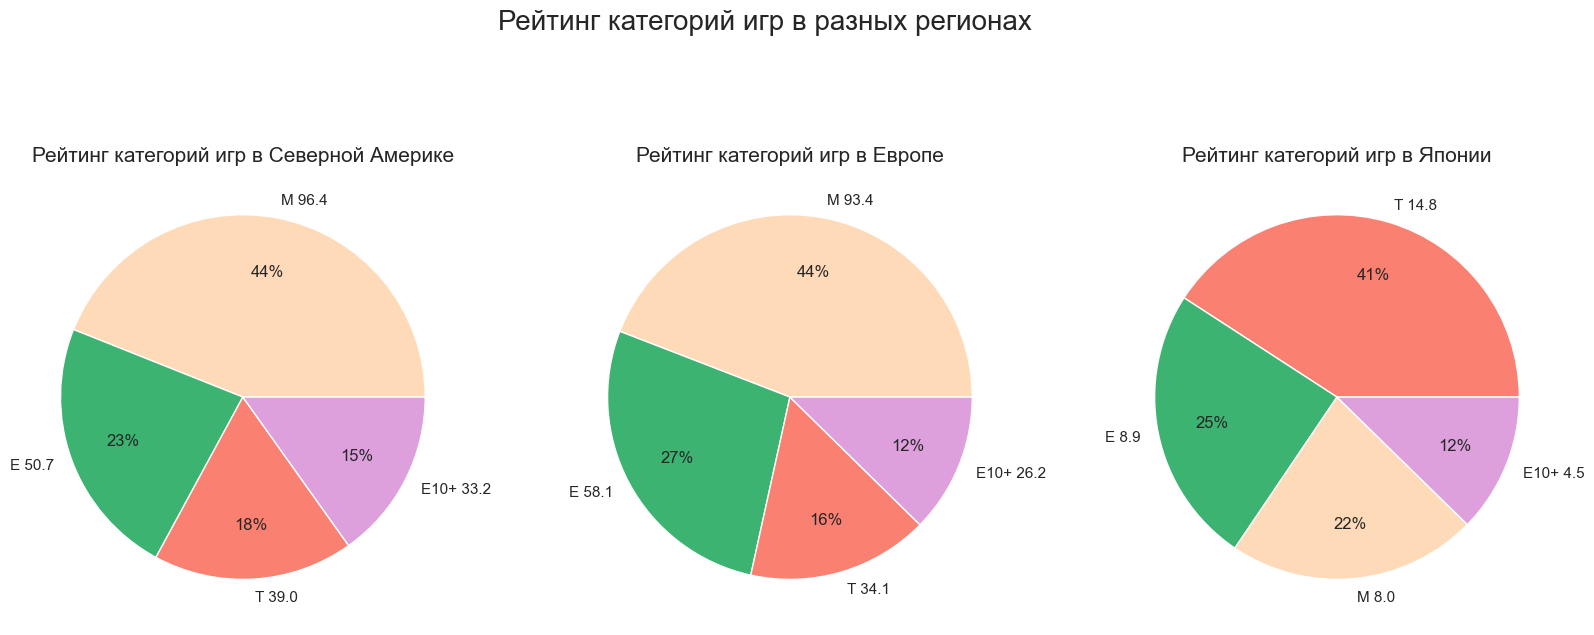

In [94]:
fig, axes = plt.subplots(1, 3, figsize=(20,8))
fig.suptitle('Рейтинг категорий игр в разных регионах', fontsize=20)

colors = {'E10+': 'plum', 'T': 'salmon', 'E': 'mediumseagreen', 'M': 'peachpuff'}

ax1 = plt.subplot(1, 3, 1)
sizes_na = rating_na_ESRB['na_sales'].values
labels_na = [f'{l} {s:1.1f}' for l, s in zip(rating_na_ESRB['rating'], sizes_na)]
rating_na_ESRB['na_sales'].plot(y='na_sales', kind='pie', autopct='%1.0f%%', pctdistance=0.7, 
                                    x=sizes_na, labels=labels_na, 
                                    colors=[colors[key] for key in rating_na_ESRB['rating']], legend=None)
plt.ylabel('')
plt.title('Рейтинг категорий игр в Северной Америке', size=15);

ax2 = plt.subplot(1, 3, 2)
sizes_eu = rating_eu_ESRB['eu_sales'].values
labels_eu = [f'{l} {s:1.1f}' for l, s in zip(rating_eu_ESRB['rating'], sizes_eu)]
rating_eu_ESRB['eu_sales'].plot(y='eu_sales', kind='pie', autopct='%1.0f%%', pctdistance=0.7, 
                                    x=sizes_eu, labels=labels_eu,
                                    colors=[colors[key] for key in rating_eu_ESRB['rating']], legend=None)
plt.ylabel('')
plt.title('Рейтинг категорий игр в Европе', size=15);

ax3 = plt.subplot(1, 3, 3)
sizes_jp = rating_jp_ESRB['jp_sales'].values
labels_jp = [f'{l} {s:1.1f}' for l, s in zip(rating_jp_ESRB['rating'], sizes_jp)]
rating_jp_ESRB['jp_sales'].plot(y='jp_sales', kind='pie', autopct='%1.0f%%', pctdistance=0.7, 
                                    x=sizes_jp, labels=labels_jp, 
                                    colors=[colors[key] for key in rating_jp_ESRB['rating']], legend=None)
plt.ylabel(' ')
plt.title('Рейтинг категорий игр в Японии', size=15)
plt.show()

**4.11** Портреты пользователя Северной Америки и Европы опять очень похожи. На первом месте категория `M`, на втором `E`, на третьем `T`, а на четвёртом `E10+`. Распределен рейтинг приблизительно в равных долях. 

Японцы имеют другие предпочтения. На первом месте категория `T`, на втором `E`, на третьем `M`, а закрывает рейтинг категория `E10+`. Возможно, это является средствием того, что японцы предпочитают другие игровые жанры (всё-таки в каждом жанре часто превалирует определённый возрастной рейтинг). 

Для того, чтобы максимально покрыть аудиторию разных регионов, рекомендуется выбрать категории `E` и `M`. Так как категория `E` занимает высокую долю во всех регионах, а `М` заключает в себе 44% всех игр среди пользователей двух больших рынков и 22% среди японцев. 

Если планируется ориентироваться на конкретный рынок, то:
- Для жителей Северной Америки и Европы рекомендуется выбирать категории `M` и `E`.
- Для жителей Японии рекомендуется выбирать категории `Т` и `E`.


### Вывод:

В рамках исследования были составлены пользовательские рейтинги по популярности платформ, жанров и категорий ESRB в Америке, Европе и Японии.

1. **Самые популярные платформы**:
 - Пользователи Северной Америки и Европы в основном пользуются одними и теми же платформами: `PS4` и `XOne` (более 50% рынка). Почти половина игроков Европы предпочитает `PS4`, а американцы почти в равных долях пользуются `PS4` и `XOne`. Популярность других платформ не сильно выражена.
- Около половины японцев предпочитают `3DS`. Стоит отметить, что платформа `WiiU`, которую мы выделили как стабильную по продажам, популярна только у японцев. 

Если сервис будет учитывать регионы, тогда:
- Для жителей Северной Америки и Европы рекомендуем ориентироваться на платформы `PS4` и `XOne`.
- Для японцев предпочтительной будет платформа `3DS`.

2. **Самые популярные жанры**:
- У жителей Северной Америки и Европы первое и второе места среди жанров почти в равных долях занимают `Action` и `Shooter`, третье - `Sports`, а четвёртое `Pole-Playing`.
- В Японии на первом месте `Role-Playing`, на втором `Action`, затем `Fighting`, `Misc`, `Shooter` .

Следовательно, рекомендуется выбирать жанр по региону. 
- Для жителей Северной Америки и Европы предпочтительными будут `Action` и `Shooter`
- Для жителей Японии - `Role-Playing` и `Action`.

Стоит учитывать, что на процент общих продаж жинра `Action` влияет количество выпускаемых игр, а не средние продажи каждой игры. Следовательно, такой жанр может быть не самым прибыльным.


3. **Самый популярный рейтинг ESRB**:
- У жителей Северной Америки и Европы на первом месте категория `M`, на втором `E`, на третьем `T`, а на четвёртом `E10+`.
- У Японцев на первом месте категория `T`, на втором `E`, на третьем `M`, а закрывает рейтинг категория `E10+`.
- Для того, чтобы максимально покрыть аудиторию разных регионов, рекомендуется выбрать категории `E` и `M`. Так как категория `E` занимает высокую долю во всех регионах, а `М` заключает в себе 44% всех игр среди пользователей двух больших рынков и 22% среди японцев.

Если планируется ориентироваться на конкретный рынок, то:
- Для жителей Северной Америки и Европы рекомендуется выбирать категории `M` и `E`.
- Для жителей Японии рекомендуется выбирать категории `T` и `E`.

<a id="5"></a>
##  Проверка гипотез

**5.1** Проверим гипотезу, что **средние пользовательские рейтинги платформ Xbox One и PC одинаковые**.

Для начала создадим два датафрейма, в которых будут только нужные нам платформы без пропущенных значений в столбце `user_score`.

In [95]:
xone = games_actual.query('platform == "XOne"').dropna(subset=['user_score'])
xone.info()

<class 'pandas.core.frame.DataFrame'>
Index: 176 entries, 14 to 1676
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             176 non-null    object 
 1   platform         176 non-null    object 
 2   year_of_release  176 non-null    int64  
 3   genre            176 non-null    object 
 4   na_sales         176 non-null    float64
 5   eu_sales         176 non-null    float64
 6   jp_sales         176 non-null    float64
 7   other_sales      176 non-null    float64
 8   critic_score     154 non-null    float64
 9   user_score       176 non-null    float64
 10  rating           169 non-null    object 
 11  total_sales      176 non-null    float64
dtypes: float64(7), int64(1), object(4)
memory usage: 17.9+ KB


In [96]:
pc = games_actual.query('platform == "PC"').dropna(subset=['user_score'])
pc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 127 entries, 51 to 1682
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             127 non-null    object 
 1   platform         127 non-null    object 
 2   year_of_release  127 non-null    int64  
 3   genre            127 non-null    object 
 4   na_sales         127 non-null    float64
 5   eu_sales         127 non-null    float64
 6   jp_sales         127 non-null    float64
 7   other_sales      127 non-null    float64
 8   critic_score     115 non-null    float64
 9   user_score       127 non-null    float64
 10  rating           109 non-null    object 
 11  total_sales      127 non-null    float64
dtypes: float64(7), int64(1), object(4)
memory usage: 12.9+ KB


**5.2** Теперь можем проверять гипотезу. Для начала нужно сформулировать нулевую и альтернативную гипотезы. 

Итак, нам нужно проверить, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Значит, строим стандартную нулевую гипотезу (равно) и двусторонную альтернативную (не равно), так как не нужно проверять, больше ли или меньше показатель одной из платформ. 

**Нулевая гипотеза: средние пользовательские рейтинги платформ Xbox One и PC равны.**

**Альтернативная гипотеза: средние пользовательские рейтинги платформ Xbox One и PC не равны.**

Проверим гипотезу. Возьмём уровень статистической значимости 0.05.

In [97]:
rating_xone = xone['user_score']
rating_pc = pc['user_score']


alpha = 0.05

results = st.ttest_ind(rating_xone, rating_pc)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.5858355856278792
Не получилось отвергнуть нулевую гипотезу


**5.3** p-value принимает достаточно высокое значение, из-за чего мы не можем отвергнуть нулевую гипотезу. Следовательно, велика вероятность, что средние пользовательские рейтинги платформ Xbox One и PC равны. 

Для большей наглядности выведем средние значения исследуемых показателей. 

In [99]:
print(rating_xone.mean())

6.182386363636363


In [100]:
print(rating_pc.mean())

6.050393700787401


**5.4** Средние значения близки друг другу, что даёт ещё больше оснований не отвергать нулевую гипотезу о равенстве. 

**5.5** Проверим вторую гипотезу: **средние пользовательские рейтинги жанров Action и Sports разные**.

Для начала создадим два датафрейма, в которых будут только нужные нам жанры без пропущенных значений в столбце `user_score`.


In [101]:
action = games_actual.query('genre == "Action"').dropna(subset=['user_score'])
action.info()

<class 'pandas.core.frame.DataFrame'>
Index: 337 entries, 1 to 1682
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             337 non-null    object 
 1   platform         337 non-null    object 
 2   year_of_release  337 non-null    int64  
 3   genre            337 non-null    object 
 4   na_sales         337 non-null    float64
 5   eu_sales         337 non-null    float64
 6   jp_sales         337 non-null    float64
 7   other_sales      337 non-null    float64
 8   critic_score     230 non-null    float64
 9   user_score       337 non-null    float64
 10  rating           320 non-null    object 
 11  total_sales      337 non-null    float64
dtypes: float64(7), int64(1), object(4)
memory usage: 34.2+ KB


In [102]:
sports = games_actual.query('genre == "Sports"').dropna(subset=['user_score'])
sports.info()

<class 'pandas.core.frame.DataFrame'>
Index: 137 entries, 3 to 1667
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             137 non-null    object 
 1   platform         137 non-null    object 
 2   year_of_release  137 non-null    int64  
 3   genre            137 non-null    object 
 4   na_sales         137 non-null    float64
 5   eu_sales         137 non-null    float64
 6   jp_sales         137 non-null    float64
 7   other_sales      137 non-null    float64
 8   critic_score     84 non-null     float64
 9   user_score       137 non-null    float64
 10  rating           131 non-null    object 
 11  total_sales      137 non-null    float64
dtypes: float64(7), int64(1), object(4)
memory usage: 13.9+ KB


**5.6** Теперь вернёмся к гипотезе о том, что средние пользовательские рейтинги жанров Action и Sports разные.

Здесь нам не нужно проверять, больше ли или меньше показатели одного из жанров, значит, используем тот же принцип, что и в первой гипотезе: нулевая о равенстве и двусторонняя альтернативная. 

**Нулевая гипотеза: средние пользовательские рейтинги жанров Action и Sports равны.**

**Альтернативная гипотеза: средние пользовательские рейтинги жанров Action и Sports не равны.**

Проверим гипотезу. Возьмём уровень статистической значимости 0.05.

In [103]:
rating_action = action['user_score']
rating_sports = sports['user_score']


alpha = 0.05

results = st.ttest_ind(rating_action, rating_sports)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 9.92015750638991e-06
Отвергаем нулевую гипотезу


**5.7** Значение p-value оказалось низким, из-за чего мы отвергаем нулевую гипотезу о равенстве средних пользовательских рейтингов жанров Action и Sports. Значит, есть высокая вероятность, что средние пользовательские рейтинги жанров Action и Sports разные (то есть это подтверждает изначальную гипотезу).

Для большей наглядности выведем средние значения оценок пользователей для двух сравниваемых датафреймов. 

In [74]:
print(rating_action.mean())

5.958160237388724

In [104]:
print(rating_sports.mean())

4.843795620437956


**5.8** Наша гипотеза подтвердилась.

### Вывод:

В рамках исследования были проверены две поставленные гипотезы, обе из которых были подтверждены. 
- Вероятно, средние пользовательские рейтинги платформ Xbox One и PC одинаковые. То, что эти показатели приближены друг к другу показывают и истинные средние значения двух совокупностей. 
- Средние пользовательские рейтинги жанров Action и Sports разные. Из конкретных средних показателей можно сделать вывод, что игры в жанре Sports оценивают ниже (4.84 балла против 5,96 баллов у игр жанра Action).

<a id="6"></a>
##  Вывод

В рамках исследовательской работы были проведены следующие этапы:
    
**1. Изучена общая информация о данных**.


**2. Были обработаны данные датафрейма:**
- Удалены строки с пропусками в столбцах `name`, `genre` и `year_of_release`.
- В стоблце `user_score` заменено значение `tbd` на 0.
- Преобразован тип данных в столбце `user_score`: `object` на `float`; тип данных в столбце `year_of_release`: `float` на `int`. 
- Создан столбец `total_sales` с суммарными продажами каждой игры во всех регионах.


**3. Был проведён исследовательский анализ:**
- Был определён актуальный период для прогнозирования: 2014-2016 годы. Также было определено, что каждая платформа имеет жизненный цикл в 9-12 лет с пиковыми значениями популярности примерно в середине цикла.
- В 2014-2016 годах действовали 10 платформ. Были выделены 3 перспективные платформы на 2017 год: `PS4`, `XOne` и `WiiU`.
- Было определено, что оценки как критиков, так и пользователей не сильно влияют на продажи игр (исследование показало низкую корреляцию).
- Также мы выявили, что для поиска потенциально прибыльных жанров рекомендуется учитывать среднее количество продаж игры определённого жанра, так как количество выпущенных игр конкретного жанра не всегда свидетельствует о прибыльности и популярности.

**4. Были составлены пользовательские рейтинги по популярности платформ, жанров и категорий ESRB в Америке, Европе и Японии.**

Было выявлено, что игроки Северной Америки и Европы похожи в своих предпочтениях. Японцы же сильно отличаются от этих двух рынков. 

**Самые популярные платформы**:

- Для жителей Северной Америки и Европы рекомендуем ориентироваться на платформы `PS4` и `XOne`.
- Для японцев предпочтительной будет платформа `3DS`.

**Самые популярные жанры**:

- Для жителей Северной Америки и Европы предпочтительными будут `Action` и `Shooter`
- Для жителей Японии - `Role-Playing` и `Action`.

Стоит учитывать, что на процент общих продаж жинра `Action` влияет количество выпускаемых игр, а не средние продажи каждой игры. Следовательно, такой жанр может быть не самым прибыльным.


**Самый популярный рейтинг ESRB**:

- Для жителей Северной Америки и Европы рекомендуется выбирать категории `M` и `E`.
- Для жителей Японии рекомендуется выбирать категории `T` и `E`.

**5. Были проверены гипотезы, выдвинутые заказчиком.**
- Вероятно, средние пользовательские рейтинги платформ Xbox One и PC одинаковые. То, что эти показатели приближены друг к другу показывают и истинные средние значения двух совокупностей.
- Средние пользовательские рейтинги жанров Action и Sports разные. Из конкретных средних показателей можно сделать вывод, что игры в жанре Sports оценивают ниже (4.84 балла против 5,96 баллов у игр жанра Action).